<a href="https://colab.research.google.com/github/hamidsadeghi68/face-clustering/blob/main/face_recognition_using_dlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **install requirements (نصب نیازمندی‌ها)**

face_recognition python package installation on **google colab** machine:

In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 21 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=7842b8c3b127d536a1682fe6b22f7e5299c71517bd19a8d206df7d2f2904aa40
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


# **download sample images (دانلود تصاویر نمونه)**

downloading images from my github page and saveing in **google colab** machine:

In [2]:
!mkdir sample_images
!wget https://github.com/hamidsadeghi68/face-clustering/raw/main/sample_images/hamid1.jpeg -P sample_images
!wget https://github.com/hamidsadeghi68/face-clustering/raw/main/sample_images/hamid2.jpeg -P sample_images
!wget https://github.com/hamidsadeghi68/face-clustering/raw/main/sample_images/Zidane.jpg -P sample_images

--2021-12-15 06:18:21--  https://github.com/hamidsadeghi68/face-clustering/raw/main/sample_images/hamid1.jpeg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hamidsadeghi68/face-clustering/main/sample_images/hamid1.jpeg [following]
--2021-12-15 06:18:21--  https://raw.githubusercontent.com/hamidsadeghi68/face-clustering/main/sample_images/hamid1.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28125 (27K) [image/jpeg]
Saving to: ‘sample_images/hamid1.jpeg’

hamid1.jpeg         100%[===================>]  27.47K  --.-KB/s    in 0.002s  

2021-12-15 06:18:21 (16.5 MB/s) - ‘sample_images/hamid1

# **A test on face_recognition (face_recognition آزمایشی بر روی)**

Face datection:

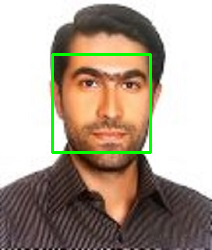

In [3]:
import os
import cv2
import face_recognition
from google.colab.patches import cv2_imshow

image1 = cv2.imread('./sample_images/hamid2.jpeg')
img_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
boxes = face_recognition.face_locations(img_rgb, model="cnn")

# show the detected face
left, top, right, bottom = boxes[0]
cv2.rectangle(image1, (left, top), (right, bottom), (0, 255, 0), 2)
cv2_imshow(image1)

Feature (template/embedding/encoding) extraction:

In [4]:
feature_vector = face_recognition.face_encodings(img_rgb, boxes)
print(feature_vector[0].shape)
print(feature_vector[0])

(128,)
[-0.02045706  0.15042466  0.03269475 -0.02357545 -0.17419897  0.09307384
 -0.00799133 -0.03271943  0.17159624 -0.01575185  0.13862367 -0.03790281
 -0.22802609 -0.04170798 -0.10471036  0.1096641  -0.19145189 -0.15742636
 -0.11192769 -0.03354044  0.06392464  0.05940554  0.09194073 -0.0088202
 -0.06007581 -0.41690075 -0.03165367 -0.09010144  0.1699463  -0.16640314
 -0.021313   -0.00894671 -0.26618916 -0.0886266   0.00586014  0.04485692
  0.01181514 -0.05792664  0.15733653  0.01166666 -0.18861113  0.11950141
  0.01856809  0.29564151  0.14729053  0.09806047 -0.02869514 -0.03797424
  0.05148821 -0.24848008  0.14535514  0.15711442  0.09477043  0.00387629
  0.05959967 -0.12550691 -0.02278725  0.07650007 -0.20917316  0.09355518
  0.11670212  0.06138049  0.01776947 -0.07989103  0.16040871  0.05047429
 -0.08205549 -0.15052746  0.01633147 -0.19894809  0.04020127  0.0164561
 -0.06143245 -0.10875759 -0.24563441  0.08059094  0.43941984  0.13830394
 -0.13624105  0.00171526 -0.06038583 -0.022222

# **Face recongnition test (آزمایش بازشناسی چهره)**

Enroll function (تابع ثبت‌نام):

In [8]:
def enroll(img_path):
  # This function takes an (single face) image dir and returns its template (feature vector)
  
  # read image file:
  img = cv2.imread(img_path)
  # convert BGR (OpenCV default) into RGB [R:Red, G:Green, B:Blue]
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # face detection (localization):
  boxes = face_recognition.face_locations(img_rgb, model="cnn")

  # feature (template/embedding/encoding) exteraction:
  encodings = face_recognition.face_encodings(img_rgb, boxes)

  return encodings[0] # multi-face images must be considered

1.   Enrolling two images (hamid1.jpeg and Zidan.jpg) as gallery:

In [9]:
data_dir = './sample_images'
imgs_names = ['hamid1.jpeg', 'Zidane.jpg']

gallery_templates = [] # create an empty list for known subjects (gallery)
for file_name in imgs_names:
    template = enroll(os.path.join(data_dir, file_name))
    gallery_templates.append(template)

2.   Comparing a probe image (hamid2.jpg) with gallery images:

In [10]:
image1 = cv2.imread('./sample_images/hamid2.jpeg')
img_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
boxes = face_recognition.face_locations(img_rgb, model="cnn")
probe_template = face_recognition.face_encodings(img_rgb, boxes)

ditances = face_recognition.face_distance(gallery_templates, probe_template[0])
print(ditances) # the smallest index (with a proper distance threshold) can be used for identification

[0.33802979 0.68673537]


# **references (منابع)**

http://dlib.net/

https://github.com/ageitgey/face_recognition

https://www.pyimagesearch.com/2018/06/18/face-recognition-with-opencv-python-and-deep-learning/